### Hal-hal yang akan dianalisa:
#### 1. Bagaimana pengaruh banyaknya kerabat terhadap keselamatan?
#### 2. Bagaimana pengaruh usia terhadap keselamatan?
#### 3. Bagaimana pengaruh jenis kelamin terhadap keselamatan?
#### 4. Bagaimana pengaruh kelas tiket 1 (vvip), 2 (vip), dan 3 (ekonomi) terhadap keselamatan?

### Pre-processing data

In [1]:
import pandas as pd

data_titanic = pd.read_csv('data_titanic.csv')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# menghapus data duplikat, jika ada
print(data_titanic.shape)
data_titanic.drop_duplicates(inplace=True)
print(data_titanic.shape)

(891, 12)
(891, 12)


In [3]:
# tidak ada data duplikat

In [4]:
# menampilkan informasi dasar terkait data, banyak kolom-baris, nama kolom, missing data, tipe data
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


In [5]:
# ada missing data pada kolom Age, Cabin, dan Embarked. Paling banyak pada kolom Cabin

In [6]:
# menampilkan banyaknya missing data pada tiap kolom
pd.DataFrame(data_titanic.isnull().sum(), columns=['jmlh miss val'])

,jmlh miss val
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# ganti missing data pada kolom Age dengan rata-ratanya
# ganti missing data pada kolom Embarked dengan modusnya
# hapus kolom Cabin karena terdapat banyak missing value, dan dirasa belum bisa memberikan informasi yang penting

In [8]:
# melihat modus pada kolom Embarked, yaitu nilai yang paling sering muncul
data_titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# drop kolom Cabin, kolom Age missing value >> rata-rata, kolom Embarked missing value >> modus
kolom_drop = ['Cabin']
data_titanic_filtered = data_titanic.drop(kolom_drop, axis=1)
data_titanic_filtered["Age"].fillna(data_titanic_filtered["Age"].mean(), inplace=True)
data_titanic_filtered["Embarked"].fillna('S', inplace=True)

In [10]:
# informasi untuk data baru, data_titanic_filtered
data_titanic_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 69.6+ KB


In [11]:
# tidak missing data lagi, semua kolom 891 entri

In [12]:
data_titanic_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Data pada kolom Age diubah untuk memudahkan analisa;
# jika bernilai <= 12 diganti 0 (anak-anak),
# jika bernilai > 12 dan <= 20 diganti 1 (remaja),
# jika bernilai > 20 dan <= 35 diganti 2 (dewasa),
# jika bernilai > 35 dan <= 62 diganti 3 (orang tua),
# dan jika bernilai > 62 diganti 4 (lansia).

In [14]:
data_titanic_filtered.loc[ data_titanic_filtered['Age'] <= 12, 'Age'] = 0
data_titanic_filtered.loc[(data_titanic_filtered['Age'] > 12) & (data_titanic_filtered['Age'] <= 20), 'Age'] = 1
data_titanic_filtered.loc[(data_titanic_filtered['Age'] > 20) & (data_titanic_filtered['Age'] <= 35), 'Age'] = 2
data_titanic_filtered.loc[(data_titanic_filtered['Age'] > 35) & (data_titanic_filtered['Age'] <= 62), 'Age'] = 3
data_titanic_filtered.loc[ data_titanic_filtered['Age'] > 62, 'Age'] = 4

In [15]:
# menambahkan kolom baru bernama Kerabat yaitu banyaknya kerabat di kapal titanic,
# yang dihitung dari kolom SibSp (banyak saudara/pasangan) + kolom Parch (banyak orang tua/anak).

In [16]:
data_titanic_filtered['Kerabat'] = data_titanic_filtered['SibSp'] + data_titanic_filtered['Parch']

In [17]:
data_titanic_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Kerabat
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,S,0


In [18]:
data_titanic_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Kerabat        891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 76.6+ KB


### Visualisasi data

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
data_titanic_filtered.Kerabat.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Kerabat, dtype: int64

In [21]:
# membuat stacked bar chart banyak kerabat terhadap keselamatan
def bar_chart(feature):
    survived = data_titanic_filtered[data_titanic_filtered['Survived']==1][feature].value_counts()
    dead = data_titanic_filtered[data_titanic_filtered['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5), title='Stacked Barplot Pengaruh Usia Terhadap Keselamatan')

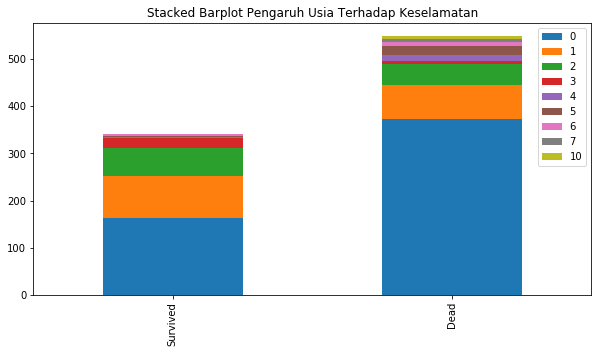

In [22]:
bar_chart('Kerabat')

In [23]:
# Banyak kerabat tidak berpengaruh secara signifikan terhadap keselamatan penumpang titanic,
# hal tsb terlihat dari kedua barplot (survived dan dead) yang semuanya terdiri dari berbagai warna.
# Warna yang berbeda menyatakan perbedaan banyaknya kerabat.

In [24]:
data_baru = pd.DataFrame(data_titanic_filtered)

In [25]:
# mengubah nilai data pada kolom Age menjadi string, untuk memudahkan interpretasi

In [26]:
data_baru = pd.DataFrame(data_titanic_filtered)
data_baru.loc[ data_baru['Age'] == 0, 'Age'] = 'Anak-Anak (<13)'
data_baru.loc[ data_baru['Age'] == 1, 'Age'] = 'Remaja (13-20)'
data_baru.loc[ data_baru['Age'] == 2, 'Age'] = 'Dewasa (21-35)'
data_baru.loc[ data_baru['Age'] == 3, 'Age'] = 'Orang Tua (36-62)'
data_baru.loc[ data_baru['Age'] == 4, 'Age'] = 'Lansia (>62)'

In [27]:
# membuat bar chart usia terhadap keselamatan
def bar_chart2(feature):
    survived = data_baru[data_baru['Survived']==1][feature].value_counts()
    dead = data_baru[data_baru['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Selamat','Mati']
    df.plot(kind='bar',stacked=False, figsize=(10,5), title='Barplot Pengaruh Usia Terhadap Keselamatan')

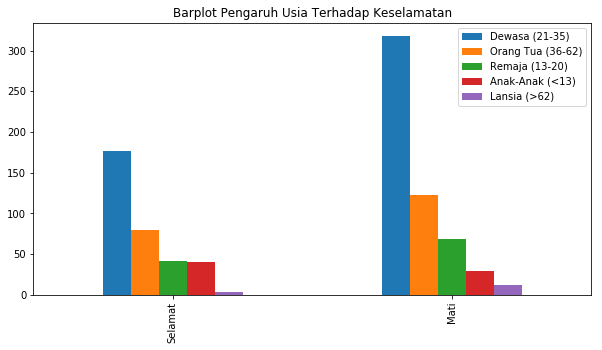

In [28]:
bar_chart2('Age')

In [29]:
# mayoritas korban meninggal adalah dari usia dewasa (21-35 tahun)
# hanya usia anak-anak (<13 tahun) yang memiliki peluang selamat lebih besar
# korban selamat dan meninggal berdasarkan usia memiliki komposisi yang hampir sama

In [30]:
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


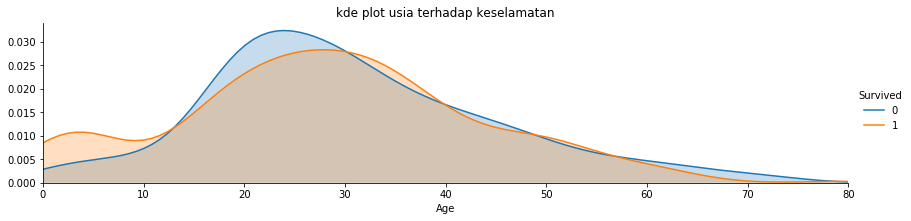

In [31]:
# membuat kde plot usia terhadap keselamatan
facet = sns.FacetGrid(data_titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data_titanic['Age'].max()), title='kde plot usia terhadap keselamatan')
facet.add_legend()
 
plt.show() 

In [32]:
# Untuk mengetahui pengaruh usia terhadap keselamatan secara lebih detail dapat digunakan kde plot.
# Pada suatu interval, jika suatu grafik lebih tinggi dari pada grafik yang lain, maka grafik tersebut lebih
# berpeluang terjadi.

# Misalnya pada kasus kde plot usia terhadap keselamatan di atas, pada interval usia 0-10 tahun
# penumpang lebih berpeluang untuk selamat, sementara pada interval usia 15-30 tahun penumpang lebih
# berpeluang untuk tidak selamat.

In [33]:
# membuat stacked barh chart jenis kelamin terhadap keselamatan
def bar_chart3(feature):
    male = data_titanic_filtered[data_titanic_filtered[feature]=='male']['Survived'].value_counts()
    female = data_titanic_filtered[data_titanic_filtered[feature]=='female']['Survived'].value_counts()
    df = pd.DataFrame([male,female])
    df.index = ['Laki-laki','Perempuan']
    df.plot(kind='barh',stacked=True, figsize=(10,5), title='Stacked Barhplot Pengaruh Jenis Kelamin Terhadap Keselamatan')

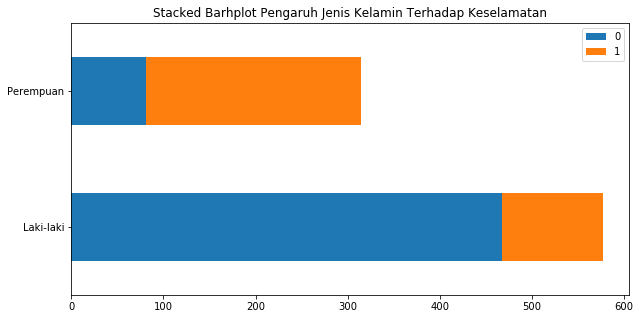

In [34]:
bar_chart3('Sex')

In [35]:
# penumpang laki-laki memiliki peluang untuk tidak selamat yang cukup besar,
# hanya sekitar 100an yang selamat dari 550 lebih penumpang laki-laki

In [36]:
# mengubah nilai pada kolom Survived menjadi string, Selamat - Tidak Selamat,
# untuk memudahkan interpretasi
data_baru3 = pd.DataFrame(data_titanic_filtered)
data_baru3.loc[ data_baru3['Survived'] == 1, 'Survived'] = 'Selamat'
data_baru3.loc[ data_baru['Survived'] == 0, 'Survived'] = 'Tidak Selamat'

In [37]:
# membuat stacked bar chart kelas tiket (Pclass) terhadap keselamatan
def bar_chart3(feature):
    vvip = data_baru3[data_baru3['Pclass']==1][feature].value_counts()
    vip = data_baru3[data_baru3['Pclass']==2][feature].value_counts()
    ekonomi = data_baru3[data_baru3['Pclass']==3][feature].value_counts()
    df = pd.DataFrame([vvip,vip,ekonomi])
    df.index = ['1 (VVIP)','2 (VIP)','3 (Ekonomi)']
    df.plot(kind='bar',stacked=True, figsize=(10,5), title='Stacked Barplot Pengaruh Kelas Tiket Terhadap Keselamatan')

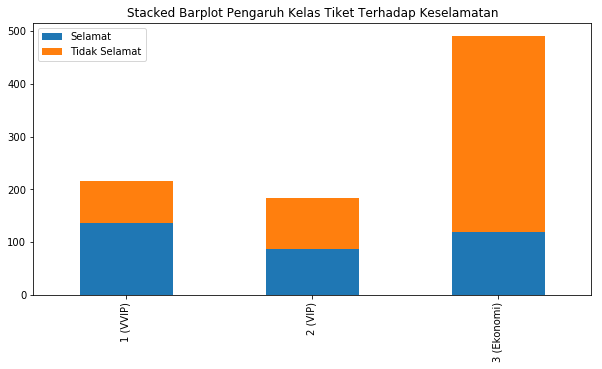

In [38]:
bar_chart3('Survived')

In [39]:
# Penumpang kelas VVIP lebih berpeluang untuk selamat, terlihat dari warna biru yang mendominasi.
# Penumpang kelas VIP memiliki peluang selamat dan tidak selamat yang hampir sama.
# Penumpang kelas ekonomi lebih berpeluang untuk tidak selamat, terlihat dari warna orange yang mendominasi.

In [40]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data_titanic.loc[ data_titanic['Sex'] == 'male', 'Sex'] = 1
data_titanic.loc[ data_titanic['Sex'] == 'female', 'Sex'] = 0

In [42]:
data_titanic['Kerabat'] = data_titanic_filtered['Kerabat']

In [43]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Kerabat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [44]:
# membuat matrix korelasi linear antar kolom yang bertipe numerik
corr = data_titanic.corr().round(3)

In [45]:
def color_corr(val):
    color = 'blue' if abs(val) > 0.3 and abs(val) < 1 else 'black'
    return 'color: %s' % color

In [46]:
s = corr.style.applymap(color_corr)
s

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Kerabat
PassengerId,1,-0.005,-0.035,0.043,0.037,-0.058,-0.002,0.013,-0.04
Survived,-0.005,1,-0.338,-0.543,-0.077,-0.035,0.082,0.257,0.017
Pclass,-0.035,-0.338,1,0.132,-0.369,0.083,0.018,-0.549,0.066
Sex,0.043,-0.543,0.132,1,0.093,-0.115,-0.245,-0.182,-0.201
Age,0.037,-0.077,-0.369,0.093,1,-0.308,-0.189,0.096,-0.302
SibSp,-0.058,-0.035,0.083,-0.115,-0.308,1,0.415,0.16,0.891
Parch,-0.002,0.082,0.018,-0.245,-0.189,0.415,1,0.216,0.783
Fare,0.013,0.257,-0.549,-0.182,0.096,0.16,0.216,1,0.217
Kerabat,-0.04,0.017,0.066,-0.201,-0.302,0.891,0.783,0.217,1


In [47]:
# Temuan dari analisis sebelumnya diperkuat oleh matrix korelasi di atas.
# Terlihat bahwa yang berkorelasi linear (negatif) cukup kuat (di atas 0.3) terhadap kolom Survived
# hanya kolom Pclass dan Sex, masing-masing dengan nilai korelasi -0.3 dan -0.5

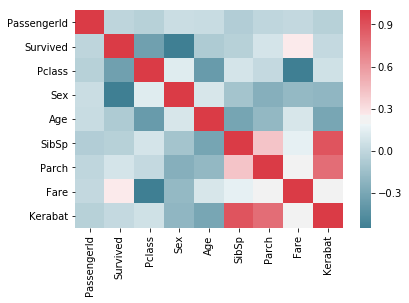

In [48]:
# heatmap matrix korelasi linear
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))